In [1]:
import pandas as pd

In [2]:
def get_na_proportion(data):
    data_na = data.isna().sum()
    data_na = data_na.reset_index()
    data_na.columns = ['column', 'na']
    data_na['proportion'] = (data_na['na']/len(data))*100
    return data_na

In [3]:
def get_gb_count(data, by_col, count_col='count'):
    data_gb = data.groupby(by_col).size()
    data_gb = data_gb.reset_index()
    data_gb.columns = [by_col, count_col]
    data_gb['proportion'] = (data_gb[count_col]/data_gb[count_col].sum())*100
    data_gb = data_gb.sort_values(by=count_col, ascending=False).reset_index(drop=True)
    return data_gb

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
agents = pd.read_csv('data/Agents.csv')

**INFO**

Fuzzy matching library called Dedupe 

**KMeans**
agents: city, country, department, (on remplace les valeurs manquantes par max value)
added: vc, buyers, suppliers

In [6]:
agents

,agentId,name,siret,address,city,zipcode,country,department,longitude,latitude
0,0,#APTIC,8.445059e+13,87 QUAI DE QUEYRIES,BORDEAUX,33100.0,FR,33,-0.561474,44.849528
1,1,LEGALLAIS SAS,NaN,TSA 70004,CAEN;,NaN,NaN,NaN,NaN,NaN
2,2,SOCIETE CORSE TRAVAUX,3.304645e+13,RN 200,ALERIA,20270.0,FR,2B,9.467566,42.129211
3,3,BECTON DICKINSON FRANCE SAS,NaN,11 RUE ARISTIDE BERGES ;,PONT E CLAIX,NaN,NaN,NaN,NaN,NaN
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,NaN,1,AAAA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,9.999900e+13,IMP CHARLES TELLIER,AVIGNON,84000.0,FR,84,4.837490,43.934885
301092,301092,STEF,9.999900e+13,RUE DES ENTREPOTS,REICHSTETT,67116.0,FR,67,7.784482,48.641132
301093,301093,STEF,9.999900e+13,2 BD DES PEUPLIERS,LOUDEAC,22600.0,FR,22,-2.748097,48.173156
301094,301094,STEF,9.999900e+13,RUE CHARLES TELLIER,BEGLES,33130.0,FR,33,-0.560904,44.810368


In [7]:
names = pd.read_csv('data/Names.csv')

In [8]:
names

,agentId,name
0,89779,COMMUNAUTE DE COMMUNES DES SABLONS
1,144381,SACER PARIS NORD EST
2,101371,OISE TP
3,143487,FORCLUM RESEAUX NORD
4,4689,OFFICE NATIONAL DES FORETS
...,...,...
506056,176458,CASSO & ASSOCIES
506057,178434,IDOX FRANCE
506058,285311,LE SENS DE LA VILLE
506059,81425,SISAM


In [9]:
agents_gb_1 = get_gb_count(agents, by_col='name', count_col='vc')

In [10]:
agents_gb_1

,name,vc,proportion
0,ELECTRICITE DE FRANCE,464,0.154104
1,CENTRE COMMUNAL D'ACTION SOCIALE,457,0.151779
2,LA POSTE,216,0.071738
3,ENGIE,211,0.070077
4,ORANGE,206,0.068417
...,...,...,...
228234,ENTREPRISE CASTILLA EURL,1,0.000332
228235,ENTREPRISE CAUX S.A.S,1,0.000332
228236,ENTREPRISE CAVALLERA,1,0.000332
228237,ENTREPRISE CAVANNA,1,0.000332


In [11]:
agents_na = get_na_proportion(agents)

In [12]:
agents_na

,column,na,proportion
0,agentId,0,0.000000
1,name,0,0.000000
2,siret,73751,24.494181
3,address,62270,20.681112
4,city,55102,18.300476
5,zipcode,69985,23.243417
6,country,63169,20.979688
7,department,69985,23.243417
8,longitude,79326,26.345750
9,latitude,79326,26.345750


In [13]:
get_gb_count(agents, by_col='longitude')

,longitude,count,proportion
0,5.026911,183,0.082518
1,2.764035,99,0.044641
2,-61.006632,66,0.029761
3,3.914811,61,0.027506
4,7.216494,56,0.025251
...,...,...,...
164168,2.161305,1,0.000451
164169,2.161270,1,0.000451
164170,2.160909,1,0.000451
164171,2.160778,1,0.000451


In [14]:
get_gb_count(agents, by_col='latitude')

,latitude,count,proportion
0,45.770598,183,0.082518
1,42.630191,99,0.044641
2,14.607392,66,0.029761
3,43.609569,61,0.027506
4,43.667161,56,0.025251
...,...,...,...
162887,45.822144,1,0.000451
162888,45.822136,1,0.000451
162889,45.822117,1,0.000451
162890,45.822068,1,0.000451


In [15]:
get_gb_count(agents, by_col='city')

,city,count,proportion
0,PARIS,15856,6.445686
1,MARSEILLE,3687,1.498817
2,LYON EME,2894,1.176451
3,TOULOUSE,2798,1.137426
4,MONTPELLIER,1861,0.756523
...,...,...,...
22032,FRANKFURT AM MAIN ALLEMAGNE,1,0.000407
22033,FRANCUEIL,1,0.000407
22034,PLOREC SUR ARGUENON,1,0.000407
22035,FRANCOURVILLE,1,0.000407


In [16]:
get_gb_count(agents, by_col='zipcode')

,zipcode,count,proportion
0,75008.0,2125,0.919472
1,75009.0,1237,0.535241
2,75011.0,1160,0.501923
3,75017.0,1034,0.447404
4,75015.0,992,0.429231
...,...,...,...
6619,60141.0,1,0.000433
6620,60138.0,1,0.000433
6621,60119.0,1,0.000433
6622,60106.0,1,0.000433


In [17]:
get_gb_count(agents, by_col='country')

,country,count,proportion
0,FR,231473,97.287403
1,DE,963,0.404746
2,BE,773,0.324890
3,UK,590,0.247975
4,IT,523,0.219815
...,...,...,...
100,SC,1,0.000420
101,LI,1,0.000420
102,RS,1,0.000420
103,DJ,1,0.000420


In [18]:
get_gb_count(agents, by_col='department')

,department,count,proportion
0,75,15900,6.879811
1,69,9017,3.901588
2,59,8738,3.780867
3,92,8416,3.641540
4,13,8240,3.565386
...,...,...,...
104,975,32,0.013846
105,20,5,0.002163
106,986,4,0.001731
107,97,1,0.000433


In [19]:
names_na = get_na_proportion(names)

In [20]:
names_na

,column,na,proportion
0,agentId,0,0.0
1,name,0,0.0


In [21]:
names_gb_1 = get_gb_count(names, by_col='name')

In [22]:
names_gb_1

,name,count,proportion
0,CENTRE COMMUNAL D'ACTION SOCIALE,225,0.044461
1,EIFFAGE,207,0.040904
2,ONET SERVICES,199,0.039323
3,COLAS,196,0.038731
4,SOCOTEC,174,0.034383
...,...,...,...
377798,EXCO - A2A CONSEIL,1,0.000198
377799,EXCO & AUTRES,1,0.000198
377800,EXCO & ASSOCIES,1,0.000198
377801,EXCO ASSOCIES,1,0.000198


In [23]:
names_gb_2 = get_gb_count(names, by_col='agentId')

In [24]:
names_gb_2

,agentId,count,proportion
0,121593,265,0.052365
1,95497,245,0.048413
2,95323,179,0.035371
3,3840,162,0.032012
4,87133,133,0.026281
...,...,...,...
301091,101318,1,0.000198
301092,101321,1,0.000198
301093,101324,1,0.000198
301094,101327,1,0.000198


In [25]:
buyers = pd.read_csv('data/LotBuyers.csv')

In [26]:
buyers_na = get_na_proportion(buyers)

In [27]:
buyers_na

,column,na,proportion
0,lotId,0,0.0
1,agentId,0,0.0


In [28]:
buyers_gb_1 = get_gb_count(buyers, by_col='agentId', count_col='buyers')

In [29]:
buyers_gb_1

,agentId,buyers,proportion
0,650,8588,0.573439
1,271115,7039,0.470009
2,2060,6823,0.455586
3,87133,6264,0.418260
4,4404,6007,0.401100
...,...,...,...
27835,91783,1,0.000067
27836,91786,1,0.000067
27837,91787,1,0.000067
27838,91792,1,0.000067


In [30]:
suppliers = pd.read_csv('data/LotSuppliers.csv')

In [31]:
suppliers_na = get_na_proportion(suppliers)

In [32]:
suppliers_na

,column,na,proportion
0,lotId,0,0.0
1,agentId,0,0.0


In [33]:
suppliers_gb_1 = get_gb_count(suppliers, by_col='agentId', count_col='suppliers')

In [34]:
suppliers_gb_1

,agentId,suppliers,proportion
0,95323,11342,0.826957
1,261321,2327,0.169664
2,95497,1614,0.117678
3,121593,1501,0.109439
4,125663,1479,0.107835
...,...,...,...
275860,123529,1,0.000073
275861,123532,1,0.000073
275862,123533,1,0.000073
275863,123539,1,0.000073


In [35]:
criterion = pd.read_csv('data/Criteria.csv')

In [36]:
criterion_na = get_na_proportion(criterion)

In [37]:
criterion_na

,column,na,proportion
0,criterionId,0,0.000000
1,lotId,0,0.000000
2,name,6,0.000206
3,weight,0,0.000000
4,type,0,0.000000


In [38]:
lots = pd.read_csv('data/Lots.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (10,14,16,20,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
lots_na = get_na_proportion(lots)

In [40]:
lots_na

,column,na,proportion
0,lotId,0,0.000000
1,tedCanId,0,0.000000
2,correctionsNb,0,0.000000
3,cancelled,0,0.000000
4,awardDate,186671,13.517432
5,awardEstimatedPrice,1191352,86.269529
6,awardPrice,426323,30.871383
7,cpv,71,0.005141
8,numberTenders,424099,30.710337
9,onBehalf,282543,20.459823


# Correction agents

In [41]:
agents_na

,column,na,proportion
0,agentId,0,0.000000
1,name,0,0.000000
2,siret,73751,24.494181
3,address,62270,20.681112
4,city,55102,18.300476
5,zipcode,69985,23.243417
6,country,63169,20.979688
7,department,69985,23.243417
8,longitude,79326,26.345750
9,latitude,79326,26.345750


Nous allons nous concentrer sur les variables:
- **city**
- **country**
- **department**

Vu que dans toutes ces colonnes, il y a une valeurs qui dominent largement les autres, donc nous allons juste remplacer les valeurs manquantes par cette valeur dominante.

In [42]:
agents_c1 = ['agentId', 'name', 'city', 'country', 'department']

Pour le clustering, nous allons ajouter d'autres valeurs numériques:
- **vc**: nombre d'id different pour chaque agent 
- **buyers**: nombre de lots achété par l'agent
- **suppliers**: nombre de lots vendu par l'agent

Pour le type de clustering:

Nous allons utiliser un **KMeans** en faisant varier les k pour déterminer le nombre optimal de cluster à l'**aide de la méthode de coude**

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def get_processor(numeric_features, categorical_features):
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ])
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    transformers = []
    if numeric_features:
        transformers.append(('num', numeric_transformer, numeric_features))
        
    if categorical_features:
        transformers.append(('cat', categorical_transformer, categorical_features))
        
    preprocessor = ColumnTransformer(
        transformers=transformers
    )
    return preprocessor

In [45]:
def transform_result(data, numeric_features, categorical_features):
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
    ])
    transformers = []
    transformer_columns = []
    
    if categorical_features:
        transformers.append(('cat', categorical_transformer, categorical_features))
        transformer_columns.extend(categorical_features)
        
    if numeric_features:
        transformers.append(('num', numeric_transformer, numeric_features))
        transformer_columns.extend(numeric_features)

    
    preprocessor = ColumnTransformer(
        transformers=transformers
    )
    
    transformed_data = preprocessor.fit_transform(data)
    
    transformed_df = pd.DataFrame(transformed_data, columns=transformer_columns)
        
    transformer_columns.append('cluster')
    
    data_other = data.drop(columns=transformer_columns)
    
    result = pd.concat([data_other, transformed_df, data[['cluster']]], axis=1)
    
    return result

In [46]:
def change_dtypes(data, dtypes):
    for column, dtype in dtypes.items():
        data[column] = data[column].astype(dtype)
        
    return data

In [47]:
def get_dtypes_columns(data, dtypes, to_remove=None):
    dtypes_columns = list(data.select_dtypes(include=dtypes).columns)
    if to_remove:
        dtypes_columns = [c for c in dtypes_columns if c not in to_remove]
    return dtypes_columns

In [48]:
def merge_data(data, others):
    merge_data = data
    for on, how, other in others:
        merge_data = pd.merge(merge_data, other, on=on, how=how)
        c = other.columns[-1]
        merge_data[c] = merge_data[c].fillna(0)
    
    return merge_data

In [49]:
other_1 = buyers_gb_1.drop(columns=['proportion'])
other_2 = suppliers_gb_1.drop(columns=['proportion'])
other_3 = agents_gb_1.drop(columns=['proportion'])

In [50]:
others = [
    ('agentId', 'left', other_1),
    ('agentId', 'left', other_2),
    ('name', 'left', other_3)
]
data = agents[['agentId', 'name', 'city', 'country', 'department']]

In [51]:
agents_merged = merge_data(data, others)

In [52]:
agents_merged

,agentId,name,city,country,department,buyers,suppliers,vc
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1
1,1,LEGALLAIS SAS,CAEN;,NaN,NaN,0.0,3.0,5
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,NaN,NaN,0.0,2.0,1
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,AAAA,NaN,NaN,0.0,2.0,1
...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7


# Question 1

Q1: peut-on identifier des classes de similarité d’agents économiques? Des lots?

## Agents Economiques

In [53]:
agents_merged.dtypes

agentId         int64
name           object
city           object
country        object
department     object
buyers        float64
suppliers     float64
vc              int64
dtype: object

In [54]:
numeric_columns = get_dtypes_columns(agents_merged, dtypes=['number'], to_remove=['agentId'])

In [55]:
numeric_columns

['buyers', 'suppliers', 'vc']

In [56]:
categorical_columns = get_dtypes_columns(agents_merged, dtypes=['object'], to_remove=['name'])

In [57]:
categorical_columns

['city', 'country', 'department']

In [58]:
def do_kmeans(data, numeric_columns, categorical_columns, k=2):
    preprocessor = get_processor(numeric_columns, categorical_columns)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    pipeline.fit(data)
    data['cluster'] = pipeline.predict(data)
    inertia = pipeline.named_steps['kmeans'].inertia_
    return data, inertia

In [59]:
def run_multiple_kmeans(data, numeric_columns, categorical_columns, end, start=2):
    inertia_values = []
    k_range = range(start, end+1)
    for k in tqdm(range(start, end+1)):
        _, inertia = do_kmeans(data, numeric_columns, categorical_columns, k)
        inertia_values.append(inertia)
    
    plt.plot(k_range, inertia_values, marker='o')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.title(f'Méthode du coude (Elbow method) k = {start}..{end}')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
    
    return get_best_k(inertia_values) + start

In [60]:
def get_best_k(values):
    # Calculer les différences d'inertie entre chaque point k et k-1
    diff_inertie = np.diff(values)

    # Calculer la différence entre les différences d'inertie successives pour identifier le coude
    # Cette opération est similaire à la seconde dérivée en calcul, où nous trouvons le point de changement maximal.
    # Nous devons utiliser la valeur absolue pour obtenir la plus grande différence indépendamment de la direction.
    diff_inertie = np.abs(np.diff(diff_inertie))

    # La valeur maximale de diff_diff_inertie indique le coude le plus prononcé.
    # Puisque la différence est calculée entre k et k-1, nous devons ajouter 1 pour obtenir le bon index de k.
    best_k = np.argmax(diff_inertie) + 1  # +1 pour compenser le décalage dû à la première différence

    return best_k

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [04:06<00:00, 12.99s/it]


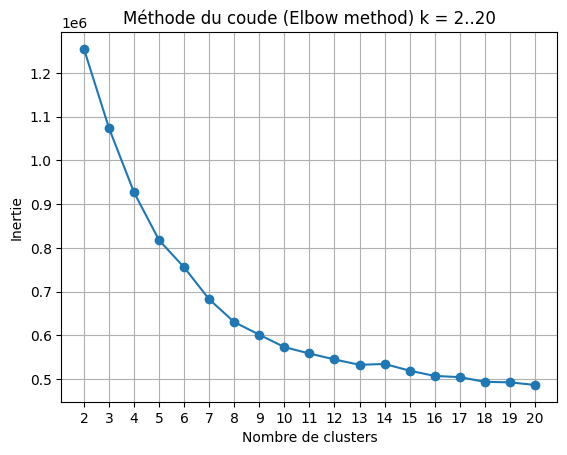

In [61]:
best_k = run_multiple_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    end = 20
)

In [62]:
best_k

5

D'après la méthode de coude, le coude semble être le plus prononcé à **k=5**, où la réduction de l'inertie ralentit nettement par rapport aux valeurs précédentes. Donc, dans ce cas, la meilleure valeur de k serait 5.

In [63]:
clusters_1, inertia_1 = do_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    k=best_k
)

In [64]:
inertia_1

817296.2985330794

In [65]:
clusters_1

,agentId,name,city,country,department,buyers,suppliers,vc,cluster
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,0
1,1,LEGALLAIS SAS,CAEN;,NaN,NaN,0.0,3.0,5,3
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,0
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,NaN,NaN,0.0,2.0,1,3
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,AAAA,NaN,NaN,0.0,2.0,1,3
...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7,0
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7,0
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7,0
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7,0


In [66]:
clusters_1 = transform_result(
    data = clusters_1,
    numeric_features = numeric_columns, 
    categorical_features = categorical_columns
)

In [67]:
dtypes = {
    'name': 'category',
    'city': 'category',
    'country': 'category',
    'department': 'category',
    'buyers':int,
    'suppliers': int,
    'vc':int,
    'cluster':'category'
}

clusters_1 = change_dtypes(clusters_1, dtypes)

In [68]:
clusters_1

,agentId,name,city,country,department,buyers,suppliers,vc,cluster
0,0,#APTIC,BORDEAUX,FR,33,0,8,1,0
1,1,LEGALLAIS SAS,CAEN;,FR,75,0,3,5,3
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0,62,2,0
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0,2,1,3
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,AAAA,FR,75,0,2,1,3
...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0,7,7,0
301092,301092,STEF,REICHSTETT,FR,67,0,1,7,0
301093,301093,STEF,LOUDEAC,FR,22,0,5,7,0
301094,301094,STEF,BEGLES,FR,33,0,3,7,0


In [69]:
clusters_1.dtypes

agentId          int64
name          category
city          category
country       category
department    category
buyers           int64
suppliers        int64
vc               int64
cluster       category
dtype: object

In [70]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [71]:
def plot_proportion(data, xcol, ycol, title, xtitle, ytitle, logy=True):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(fontsize=6)
    
    X = data[xcol].values.astype(str)
    y = data[ycol].values
    
    # Utiliser une colormap pour les couleurs des barres
    # Assurez-vous que les valeurs y sont normalisées pour la colormap
    norm = mcolors.Normalize(vmin=y.min(), vmax=y.max())
    mapper = cm.ScalarMappable(norm=norm, cmap='viridis')
    colors = mapper.to_rgba(y)

    # Ajouter une barre de couleur (légende) pour indiquer les valeurs
    cbar = fig.colorbar(mapper, ax=ax)
    cbar.set_label('Couleurs')
    
    ax.bar(X, y, color=colors)
    plt.xticks(rotation=0)
    if logy:
        ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)

In [72]:
cluster_1_gb = get_gb_count(clusters_1, by_col='cluster')

In [73]:
cluster_1_gb

,cluster,count,proportion
0,0,213438,70.887026
1,3,85648,28.445413
2,1,1727,0.573571
3,4,282,0.093658
4,2,1,0.000332


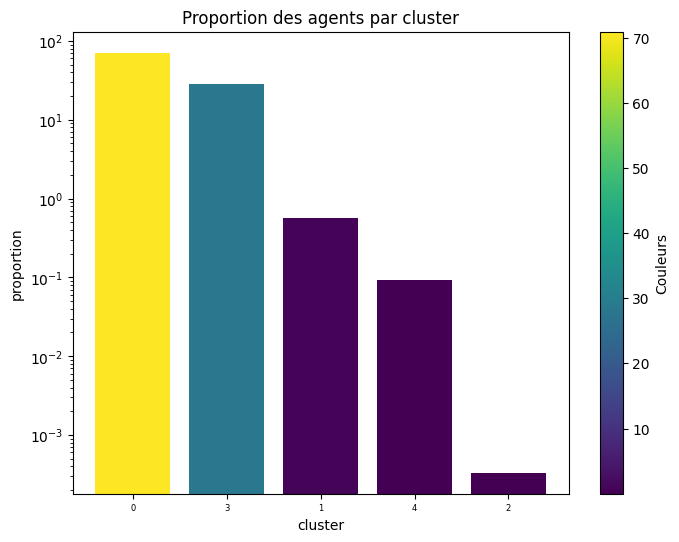

In [74]:
plot_proportion(
    data=cluster_1_gb, 
    xcol='cluster', 
    ycol='proportion',
    title='Proportion des agents par cluster',
    xtitle='cluster',
    ytitle='proportion',
    logy=True
)

## Lots

# Question 2

Q2: quelles sont les variables et valeurs qui permettent de distinguer ces classes et/ou qui sont caractéristiques de certaines classes?

## Agents Economiques

- **Importance des variables (Feature importance):** 

Utiliser des méthodes comme les forêts aléatoires (Random Forests) ou d'autres modèles basés sur des arbres pour évaluer l'importance des caractéristiques. Entraînez le modèle pour prédire l'appartenance aux clusters et analysez l'importance des caractéristiques.

- **Analyse de la moyenne ou du mode:** 

Pour les variables numériques, calculez la moyenne de chaque variable pour chaque cluster. Pour les variables catégorielles, calculez le mode (la valeur la plus fréquente).

In [75]:
def get_moyenne_mode(data, numeric_features, categorical_features, k_best):
    result = data.groupby('cluster')[categorical_features[0]].agg(lambda x: x.mode()[0]).reset_index()
    for col in categorical_features[1:]:
        df2 = data.groupby('cluster')[col].agg(lambda x: x.mode()[0]).reset_index()
        result = pd.merge(result, df2, on='cluster', how='inner')
        
    for col in numeric_features:
        df2 = data.groupby('cluster')[col].mean().reset_index()
        result = pd.merge(result, df2, on='cluster', how='inner')
        
    return result

In [76]:
get_moyenne_mode(
    data=clusters_1,
    numeric_features=numeric_columns,
    categorical_features=categorical_columns,
    k_best=best_k
)

,cluster,city,country,department,buyers,suppliers,vc
0,0,MARSEILLE,FR,69,4.178380,5.268645,4.657282
1,1,PARIS,FR,75,11.499131,5.729010,340.540822
2,2,NIORT,FR,79,0.000000,11342.000000,8.000000
3,3,PARIS,FR,75,0.905742,2.626635,2.264525
4,4,PARIS,FR,75,1802.741135,2.851064,11.606383


**Interpretation**

Sur la base des résultats du tableau, voici une analyse des variables qui caractérisent chaque cluster :

**Cluster 0 (Marseille)** : Les valeurs de "buyers", "suppliers" et "vc" sont modérées. Ce cluster est équilibré en termes d'acheteurs et de fournisseurs, avec une légère variabilité dans les noms des agents, ce qui peut suggérer une diversité d'entreprises de taille moyenne.

**Cluster 1 (Paris)** : La variable "vc" est extrêmement élevée comparée aux autres clusters, indiquant une forte concentration d'agents partageant le même nom, ce qui pourrait signifier la présence de grandes entreprises ou de groupes avec de nombreuses filiales. Les variables "buyers" et "suppliers" ont des valeurs plus élevées que le cluster 0, ce qui peut refléter une activité économique plus intense.

**Cluster 2 (Niort)** : Ce cluster se distingue par un nombre très élevé de "suppliers" et une absence de "buyers", indiquant que cette région pourrait être un centre de production ou de distribution majeur. La valeur de "vc" est supérieure à celle du cluster 0, suggérant également une certaine concentration de noms d'agents.

**Cluster 3 (Paris)** : Avec des valeurs relativement basses pour "buyers", "suppliers" et "vc", ce cluster peut représenter de petites entreprises ou des indépendants qui opèrent dans la région parisienne.

**Cluster 4 (Paris)** : Ce cluster présente une valeur anormalement élevée pour "buyers" et des valeurs relativement basses pour "suppliers" et "vc". Cela pourrait indiquer un ou plusieurs très grands acheteurs, comme des chaînes de magasins ou des consortiums d'achat basés à Paris.

En général, les clusters peuvent être distingués par le nombre de fois où les agents apparaissent comme acheteurs ou fournisseurs, et le nombre d'agents ayant le même nom, donnant une indication de la taille et du type d'activité économique. Les variables catégorielles, telles que la ville, le pays et le département, donnent un contexte géographique qui peut être associé à des spécificités économiques régionales.

- **Visualisations:**

Créez des visualisations comme des boîtes à moustaches (boxplots) ou des graphiques en barres pour les différentes variables par cluster pour identifier visuellement les différences.

In [77]:
def plot_categorial_categorical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

In [78]:
import seaborn as sns

In [79]:
def plot_categorial_numerical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    sns.violinplot(data=data, x=xlabel, y=ylabel)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

In [105]:
clusters_1

,agentId,name,city,country,department,buyers,suppliers,vc,cluster
0,0,#APTIC,BORDEAUX,FR,33,0,8,1,0
1,1,LEGALLAIS SAS,CAEN;,FR,75,0,3,5,3
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0,62,2,0
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0,2,1,3
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,AAAA,FR,75,0,2,1,3
...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0,7,7,0
301092,301092,STEF,REICHSTETT,FR,67,0,1,7,0
301093,301093,STEF,LOUDEAC,FR,22,0,5,7,0
301094,301094,STEF,BEGLES,FR,33,0,3,7,0


In [201]:
def grouby_by_values(data, column, by, threshold):
    data_gb = data[column].value_counts()
    values = data_gb[data_gb > threshold].index
    data[by[-1]] = data[column].apply(lambda x: x if x in values else 'Others')
    data_gb = data.groupby(by).size().unstack(fill_value=0)
    data_gb.columns.name = column
    return data_gb

In [202]:
gb_1 = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'country_group'],
    column='country',
    threshold = 500
)

In [203]:
gb_1

country,BE,DE,FR,IT,Others,RE,UK
cluster,,,,,,,
0,276,419,210405,213,1500,426,199
1,1,1,1721,0,3,0,1
2,0,0,1,0,0,0,0
3,496,543,82234,310,1597,78,390
4,0,0,281,0,1,0,0


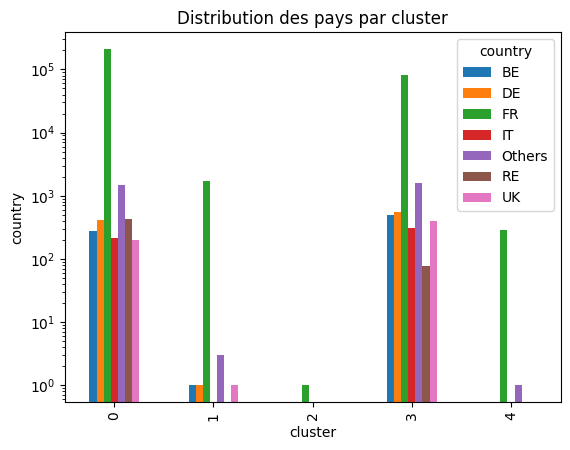

In [153]:
plot_categorial_categorical(
    data=gb_1,
    title="Distribution des pays par cluster",
    xlabel="cluster",
    ylabel="country",
    logy=True
)

D'après la distribution des pays par clusters avec la catégorie 'Others' représentant les pays ayant 500 agents ou moins, voici les caractéristiques distinctives pour chaque cluster :

**Cluster 0**: 
- Dominé par la France ('FR'), ce qui indique une forte activité locale.
- Présence notable de 'BE' (Belgique), 'DE' (Allemagne), 'RE' (Réunion), et 'UK' (Royaume-Uni), suggérant des liens économiques avec ces pays.
- La catégorie 'Others' a une présence minime, ce qui suggère que les activités sont principalement centrées autour des pays représentés de manière significative.

**Cluster 1**: 
- Forte présence en France, avec une représentation très limitée des autres pays.
- La distribution indique une concentration élevée d'activités spécifiques à la France dans ce cluster.

**Cluster 2**: 
- Uniquement représenté par la France, indiquant un cluster très concentré sur le marché local ou national français.

**Cluster 3**: 
- Présence écrasante en France, mais également une représentation des 'BE', 'DE', et 'UK' plus importante que dans le cluster 1.
- Une activité économique probablement variée et des échanges internationaux plus forts sont caractéristiques de ce cluster.

**Cluster 4**: 
- Quasiment exclusivement français, indiquant des activités concentrées en France sans diversité internationale significative.

En résumé, les clusters peuvent être distingués principalement par la prédominance de la France et la diversité des liens internationaux. Les clusters avec une représentation plus large des pays européens pourraient indiquer des entreprises ayant des opérations ou des partenariats au-delà des frontières françaises. En contraste, les clusters avec peu ou pas de présence dans les catégories 'BE', 'DE', 'RE', 'UK' et 'Others' tendent à refléter des marchés fortement concentrés sur la France.

In [228]:
gb_2 = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'city_group'],
    column='city',
    threshold= 1800
)

In [229]:
gb_2

city,LYON EME,MARSEILLE,MONTPELLIER,NANTES,Others,PARIS,TOULOUSE
cluster,,,,,,,
0,2852,3626,1834,1779,200554,34,2759
1,34,51,21,32,1467,90,32
2,0,0,0,0,1,0,0
3,1,4,0,2,14832,70809,0
4,7,6,6,6,225,25,7


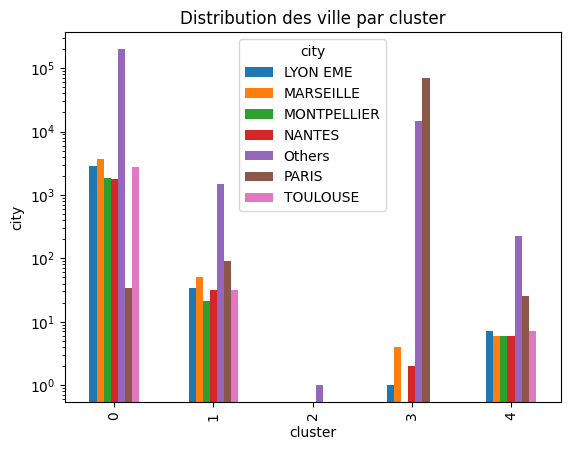

In [230]:
plot_categorial_categorical(
    data=gb_2,
    title="Distribution des ville par cluster",
    xlabel="cluster",
    ylabel="city",
    logy=True
)

Sur la base de la distribution des villes par cluster, avec la catégorie 'Others' désignant les villes ayant moins de 1800 agents, voici comment les variables "city" et "cluster" permettent de distinguer les différentes classes :

**Cluster 0** : 
- Une présence significative de Lyon EME, Marseille, et Montpellier.
- Paris est également représenté, mais moins dominant que dans d'autres clusters.
- Cela peut suggérer que ce cluster inclut une variété d'activités réparties sur plusieurs grandes villes, sans une concentration extrême dans une seule métropole.

**Cluster 1** :
- Les villes de Nantes, Toulouse et la catégorie 'Others' ont des représentations comparables.
- Lyon EME et Marseille sont également présents, mais dans une moindre mesure.
- Ce cluster pourrait caractériser des activités distribuées parmi plusieurs villes de taille moyenne, ou une variété de villes moins peuplées.

**Cluster 2** :
- Très faible représentation de toutes les villes, y compris 'Others'.
- Suggère un cluster avec une présence dispersée ou un nombre plus faible d'agents dans toutes les villes enregistrées.

**Cluster 3** :
- Dominé de manière écrasante par Paris, indiquant un cluster fortement concentré sur la capitale.
- Les autres villes, y compris 'Others', ont une présence marginale.
- Ce cluster peut indiquer un centre d'activité économique majeur, centré sur Paris.

**Cluster 4** :
- Représentation modérée de Paris et Toulouse, avec une légère présence des autres villes.
- Comme le cluster 2, il pourrait représenter des activités étendues mais moins concentrées, potentiellement caractérisées par des agents ou des entreprises qui opèrent à une échelle plus petite ou plus localisée.

En synthèse, la répartition des villes met en lumière où les activités des agents sont concentrées au sein de chaque cluster. Paris se démarque comme un centre d'activité majeur dans le cluster 3, tandis que les autres clusters montrent une distribution plus homogène entre les différentes villes, avec une mention spéciale pour Lyon EME et Marseille dans le cluster 0. La catégorie 'Others' indique la présence d'activités dans des villes plus petites ou moins peuplées.

In [231]:
gb_3 = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'department_group'],
    column='department',
    threshold= 6000
)

In [232]:
gb_3

department,13,33,59,69,75,92,Others
cluster,,,,,,,
0,8154,5983,8643,8943,104,8346,173265
1,78,57,81,64,110,61,1276
2,0,0,0,0,0,0,1
3,0,0,0,0,85646,0,2
4,8,8,14,10,25,9,208


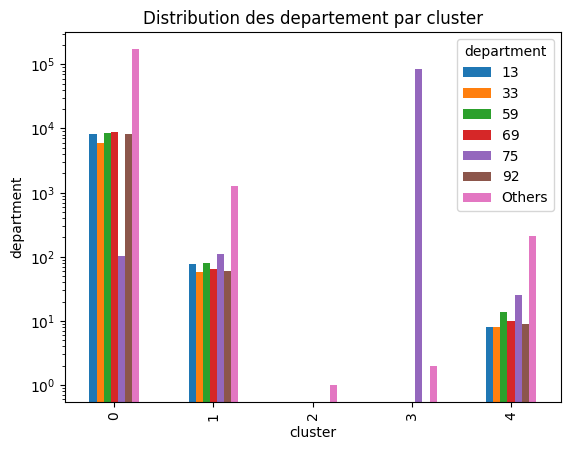

In [233]:
plot_categorial_categorical(
    data=gb_3,
    title="Distribution des departement par cluster",
    xlabel="cluster",
    ylabel="department",
    logy=True
)

La distribution des départements par cluster, avec la catégorie 'Others' désignant les départements ayant moins de 6000 agents, montre la concentration géographique des activités parmi les agents dans chaque cluster. Voici comment les variables et valeurs peuvent distinguer chaque classe :

**Cluster 0** :
- Présente une distribution équilibrée entre les départements 13 (Bouches-du-Rhône), 33 (Gironde), 59 (Nord), et 69 (Rhône), ainsi qu'une présence considérable de la catégorie 'Others'.
- Cela suggère que ce cluster couvre une diversité géographique substantielle et inclut des agents opérant dans un éventail de régions.

**Cluster 1** :
- Montre une dominance du département 75 (Paris) par rapport aux autres départements, mais avec encore une représentation notable des 'Others'.
- Indique que ce cluster est fortement centré autour de Paris, tout en ayant une activité économique qui s'étend également à d'autres départements moins représentés.

**Cluster 2** :
- Les départements représentés ici sont beaucoup moins nombreux, et la catégorie 'Others' est presque inexistante.
- Ceci suggère un cluster avec très peu d'agents, ou un cluster focalisé sur un nombre limité de départements spécifiques.

**Cluster 3** :
- Est fortement dominé par le département 75 (Paris), indiquant une concentration extrême des activités dans la capitale française, sans beaucoup de dispersion dans d'autres départements.

**Cluster 4** :
- Présente une distribution considérable pour la catégorie 'Others', ainsi que pour les départements 33 (Gironde), 69 (Rhône), et 92 (Hauts-de-Seine).
- Cette distribution suggère que ce cluster est caractérisé par des activités qui se répartissent non seulement dans des centres urbains majeurs mais aussi dans des départements avec moins d'agents.

La catégorie 'Others' joue un rôle important dans les clusters 0 et 4, indiquant que ces clusters englobent une gamme de départements qui ne sont pas les plus densément peuplés en termes d'agents. Ces caractéristiques peuvent refléter la nature des activités économiques, avec des clusters 0 et 4 représentant une diversité de localisations, tandis que les clusters 1 et 3 montrent une concentration d'activités autour de Paris.

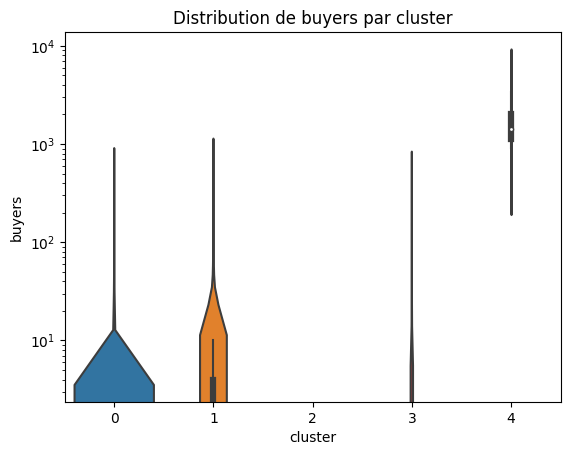

In [234]:
plot_categorial_numerical(
    data=clusters_1,
    title="Distribution de buyers par cluster",
    xlabel='cluster',
    ylabel='buyers',
    logy=True
)

En analysant le graphique de la distribution du nombre de fois que chaque agent est acheteur par cluster, on peut tirer les conclusions suivantes :

**Cluster 0** : 
- Montre une grande variabilité dans le nombre de fois que les agents sont acheteurs, avec certains agents achetant très fréquemment.
- Ceci pourrait indiquer un mélange d'agents, des petits aux très actifs, en termes d'achats.

**Cluster 1** : 
- Présente une distribution plus resserrée avec moins de variabilité et des valeurs généralement plus basses.
- Les agents dans ce cluster sont acheteurs moins fréquemment, ce qui peut signifier que ce cluster est composé de petits acheteurs ou d'entités opérant à une échelle moins importante.

**Cluster 2** : 
- Ne montre pas de valeurs élevées, ce qui suggère que les agents de ce cluster sont rarement acheteurs.
- Cela pourrait refléter des entités qui sont soit nouvelles dans le marché, soit opèrent principalement en tant que fournisseurs.

**Cluster 3** : 
- Présente une gamme de fréquence d'achats, mais avec une médiane plus élevée que le cluster 1.
- Cela pourrait indiquer une concentration plus grande d'agents moyennement actifs en tant qu'acheteurs.

**Cluster 4** : 
- A un écart-type relativement élevé et une médiane supérieure, indiquant que ce cluster contient un nombre d'acheteurs actifs notablement plus grand.
- Ce cluster pourrait donc représenter de grands acheteurs ou des entreprises qui effectuent des transactions fréquemment.

Ces observations suggèrent que le rôle des agents en tant qu'acheteurs varie considérablement entre les clusters, avec des clusters démontrant des fréquences d'achat depuis occasionnelles jusqu'à très fréquentes. Les différences dans les distributions indiquent non seulement la fréquence des achats mais également la taille et l'activité économique des agents au sein de chaque cluster.

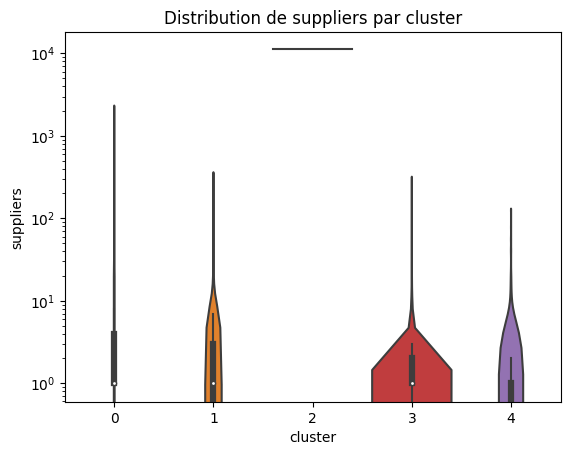

In [235]:
plot_categorial_numerical(
    data=clusters_1,
    title="Distribution de suppliers par cluster",
    xlabel='cluster',
    ylabel='suppliers',
    logy=True
)

**Cluster 0** : Présente une médiane basse et une distribution étendue, suggérant que la plupart des agents dans ce cluster sont fournisseurs occasionnellement, avec quelques valeurs aberrantes qui pourraient représenter de très gros fournisseurs.

**Cluster 1** : Montre une variabilité moindre et une médiane plus élevée que le cluster 0, ce qui suggère que les agents de ce cluster sont généralement plus régulièrement fournisseurs, bien que toujours à une échelle relativement modeste.

**Cluster 2** : A une distribution large avec une médiane légèrement supérieure et des valeurs aberrantes, indiquant une variabilité importante dans la fréquence à laquelle les agents agissent en tant que fournisseurs.

**Cluster 3** : Le boxplot est notablement étendu, avec une médiane supérieure et une large gamme de valeurs, indiquant la présence d'agents qui sont fréquemment fournisseurs ainsi que de nombreux agents avec une fréquence plus modeste.

**Cluster 4** : Présente une médiane et une IQR plus élevées que les autres clusters, suggérant que les agents de ce cluster sont généralement des fournisseurs actifs avec une fréquence plus élevée par rapport aux autres clusters.

Les variables "cluster" et "suppliers" permettent donc de distinguer les classes en fonction de la fréquence à laquelle les agents opèrent en tant que fournisseurs. Les différences entre les clusters peuvent indiquer divers modèles commerciaux, tailles d'entreprise, ou des spécialisations sectorielles qui influencent la fréquence à laquelle les agents sont enregistrés en tant que fournisseurs.

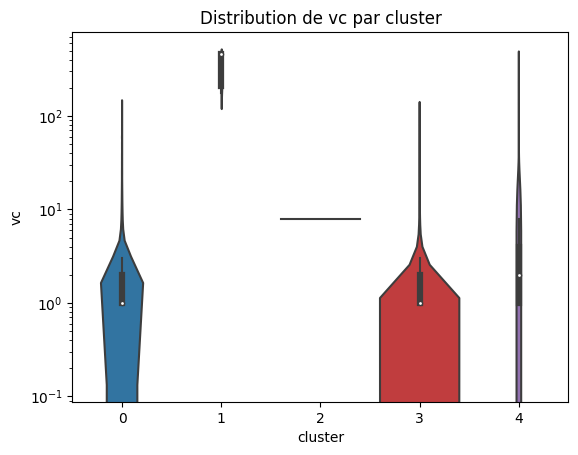

In [236]:
plot_categorial_numerical(
    data=clusters_1,
    title="Distribution de vc par cluster",
    xlabel='cluster',
    ylabel='vc',
    logy=True
)

Ce graphique représente un diagramme en boîte (boxplot) montrant la distribution de la variable "vc" (qui représente le nombre d'agents ayant le même nom) par cluster.

**Cluster 0** :
- Montre une médiane basse avec une distribution assez étroite, suggérant que la plupart des agents ont des noms uniques ou ne partagent leur nom qu'avec un petit nombre d'autres agents. Il y a quelques valeurs aberrantes, indiquant quelques noms très communs ou des entités avec plusieurs branches ou représentants.

**Cluster 1** :
- Présente une médiane légèrement plus élevée que le cluster 0, avec une variabilité similaire. La présence de valeurs aberrantes est plus marquée, ce qui peut indiquer des entreprises ou des entités avec plusieurs branches ou un nom commun.

**Cluster 2** :
- La médiane est presque identique à celle des clusters 0 et 1, mais il y a une gamme de valeurs plus étroite autour de la médiane, indiquant moins de variabilité dans le nombre de noms partagés.

**Cluster 3** :
- Ce cluster a une distribution beaucoup plus large avec une médiane significativement plus élevée et des valeurs aberrantes importantes, ce qui signifie que de nombreux agents partagent le même nom, ce qui pourrait indiquer de grandes organisations ou des groupes d'entreprises.

**Cluster 4** :
- Comme le cluster 3, ce cluster a également une médiane élevée et une large distribution, mais avec des valeurs aberrantes encore plus extrêmes, ce qui suggère la présence d'agents ou d'entreprises très fréquents et peut-être très influents qui partagent le même nom.

En résumé, la variable "vc" montre combien de fois des noms d'agents sont répétés au sein de chaque cluster, ce qui peut indiquer la taille ou la structure des entités au sein de ces clusters. Les clusters avec des médianes élevées et des distributions larges (clusters 3 et 4) pourraient représenter des entités plus grandes ou des franchises, tandis que ceux avec des médianes basses et moins de valeurs aberrantes (clusters 0, 1 et 2) pourraient être constitués d'agents plus petits ou plus indépendants.

- **Tests statistiques:**

Effectuer des tests statistiques (tels que l'ANOVA pour les variables numériques ou le test du chi-carré pour les variables catégorielles) pour voir si les différences entre les clusters sont statistiquement significatives.

# Question 3

Q3: comment interpréter ces classes, que signifient-elles?

# Question 4

Q4: y a-t-il des anomalies (lots ou agents)?

# Question 5

Q5: si oui, lesquelles et comment les expliquer?

# Question 6

Q6: y a-t-il des différences entre agents et lots issus de secteurs d’activité différents?

# Question 7

Q7: Si oui, lesquelles, et comment les interpréter?

# Question 8

Q8: y a-t-il des différences entre agents et lots issus de divisions administratives différentes?

# Question 9

Q9: Si oui, lesquelles, et comment les interpréter?

# Question 10

Q10:Y a-t-il un lien entre l’attribution d’un contrat et la distance spatiale séparant l’acheteur et le fournisseur remportant le marché?

# Question 11

Q11: Ou bien entre cette distance et le montant du contrat, voire une autre variable?

# Question 12

Q12: quelle est la part des PME dans la commande publique? Par secteur? Par type d’acheteur?

# Question 13

Calcule des indicateurs économiques pour révéler un fonctionnement problématique des marchés publiques [1]

[1]:

J. Ferwerda, I. Deleanu et B. Unger. « Corruption in Public Procurement : Finding the Right
Indicators ». In : European Journal on Criminal Policy and Research 23.2 (2016), p. 245-267.
doi : 10.1007/s10610-016-9312-3.


Calculer des indicateurs économiques et étudier leurs distributions dans nos données, mesurer et discuter l’association avec les variables de la FOPPA pour les agents et pour les lots (ça peut-être révélateur)

# Question 14

Exploiter l'actualité: des affaires de fraude dans les marchés publics qui sont révélées dans la presse.

Ex: l’affaire Mckinsey https://fr.wikipedia.org/wiki/Affaire_McKinsey

Chercher dans la FOPPA des marchés concernés, puis identifier quelles caractéristiques les distinguent de la masse des marchés non-frauduleux.
